Data Preparation and Preliminary Analysis - tamdak8917 - 02/08/2025

In [1]:
#import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display, Markdown

todays_date = datetime.now().strftime("%Y-%m-%d")
student_id = "tamdak8917"

#get the data for breast-cancer-wisconsin
data = pd.read_csv('breast-cancer-wisconsin.data')

#view data sample
print(data.head())

   1000025  5   1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0  1002945  5   4    4    5  7  10  3    2    1    2
1  1015425  3   1    1    1  2   2  3    1    1    2
2  1016277  6   8    8    1  3   4  3    7    1    2
3  1017023  4   1    1    3  2   1  3    1    1    2
4  1017122  8  10   10    8  7  10  9    7    1    4


In [2]:
#add column names
data.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
print(data)

     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1002945                5                        4   
1               1015425                3                        1   
2               1016277                6                        8   
3               1017023                4                        1   
4               1017122                8                       10   
..                  ...              ...                      ...   
693              776715                3                        1   
694              841769                2                        1   
695              888820                5                       10   
696              897471                4                        8   
697              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           4                  5                            7   
1        

In [3]:
#shape gives number of fetures (columns) and observations(rows)
data.shape

#info provised column names, non-null data count for the collumn, and data type
data.info()

#describe gives count, mean, standard dev, min & max, and quartiles
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
#Bare Nulei has ? in place of nan, so not showing as missing, but causing object type
#replace the questionmarks
data['Bare Nuclei'].replace("?", np.nan, inplace=True)

#check for missing values with questionmarks replaced
print("Sum of null values:")
data.isnull().sum()

Sum of null values:


C:\Users\cis101\AppData\Local\Temp\ipykernel_8652\3676933566.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bare Nuclei'].replace("?", np.nan, inplace=True)


Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [5]:
#to replace the Bare Nuclei nan with the mean, need to remove nan and get mean
#remove nan
bare_cleaning_df = data[['Bare Nuclei']].dropna()

#change data type to int since it was showing as object
bare_cleaning_df = bare_cleaning_df.astype('int')

#print mean of bare nuclei
print(f"Mean: {bare_cleaning_df.mean()}")

#fill na with mean
data['Bare Nuclei'].fillna(int(bare_cleaning_df.mean()), inplace=True)

#update all to int for Bare Nuclei
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int')

#update all to int for Clump Thickness due to error stating type is string
data['Clump Thickness'] = data['Clump Thickness'].astype('int')

#check for missing values after using fillna
print("Sum of null values:")
data.isnull().sum()

Mean: Bare Nuclei    3.548387
dtype: float64
Sum of null values:


C:\Users\cis101\AppData\Local\Temp\ipykernel_8652\3984233791.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data['Bare Nuclei'].fillna(int(bare_cleaning_df.mean()), inplace=True)
C:\Users\cis101\AppData\Local\Temp\ipykernel_8652\3984233791.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bare Nuclei'].fillna(int(bare_cleaning_df.mean()), inplace=True)


Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
#check for duplicate rows
print(data[data.duplicated()])
data.duplicated().sum()

     Sample code number  Clump Thickness  Uniformity of Cell Size  \
207             1218860                1                        1   
252             1100524                6                       10   
253             1116116                9                       10   
257             1198641                3                        1   
271              320675                3                        3   
337              704097                1                        1   
560             1321942                5                        1   
683              466906                1                        1   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
207                         1                  1                            1   
252                        10                  2                            8   
253                        10                  1                           10   
257                         1                  1      

np.int64(8)

In [7]:
#sammple code number is unique, so must be real duplicates and not coincidence
#drop the 8 duplicates
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           690 non-null    int64
 1   Clump Thickness              690 non-null    int64
 2   Uniformity of Cell Size      690 non-null    int64
 3   Uniformity of Cell Shape     690 non-null    int64
 4   Marginal Adhesion            690 non-null    int64
 5   Single Epithelial Cell Size  690 non-null    int64
 6   Bare Nuclei                  690 non-null    int64
 7   Bland Chromatin              690 non-null    int64
 8   Normal Nucleoli              690 non-null    int64
 9   Mitoses                      690 non-null    int64
 10  Class                        690 non-null    int64
dtypes: int64(11)
memory usage: 64.7 KB


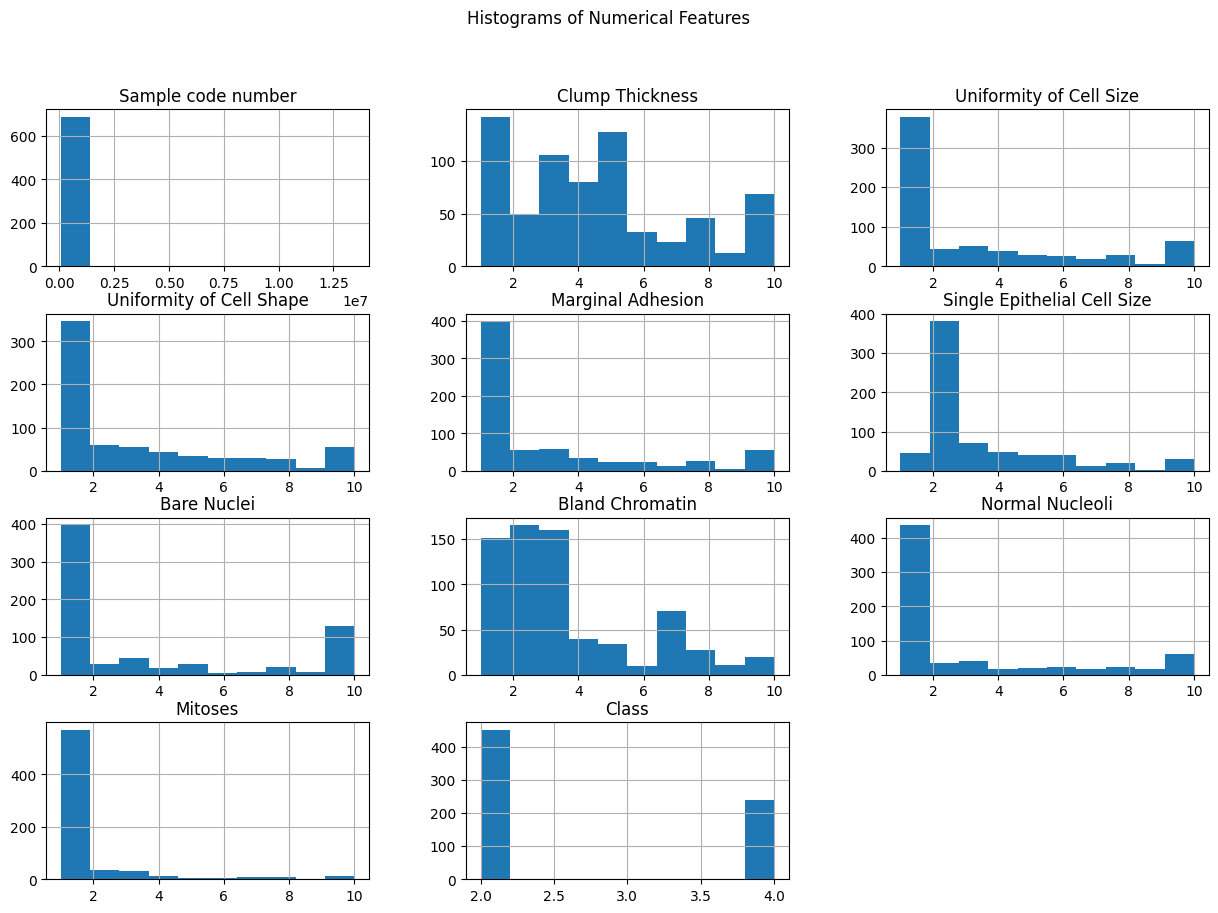

In [8]:
#univariate Analysis histogram
# Use Histograms for numerical features to show count of each measurement
data.hist(bins=10, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

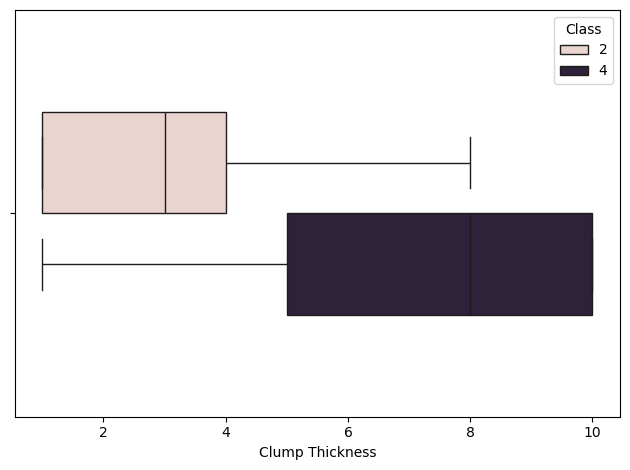

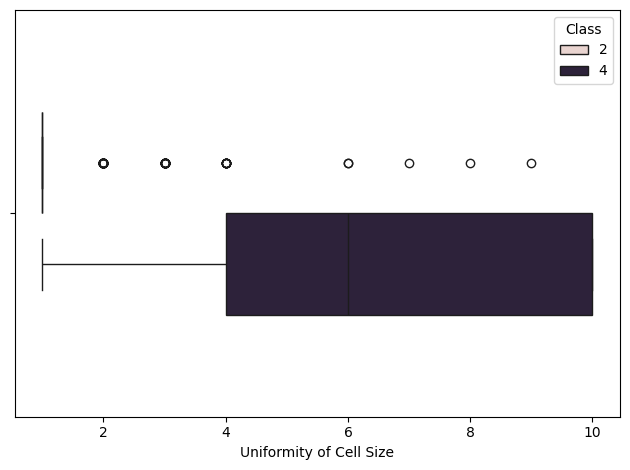

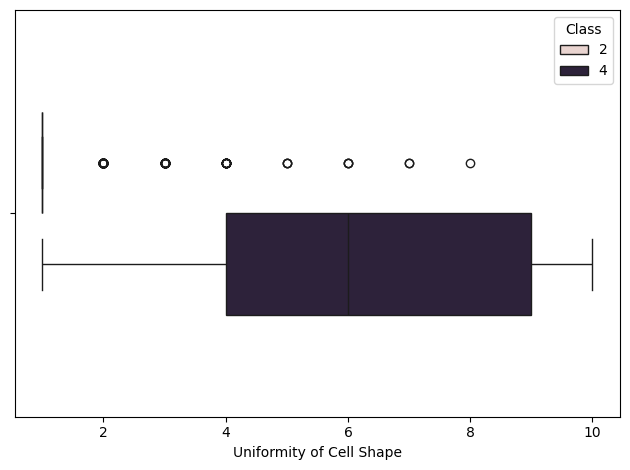

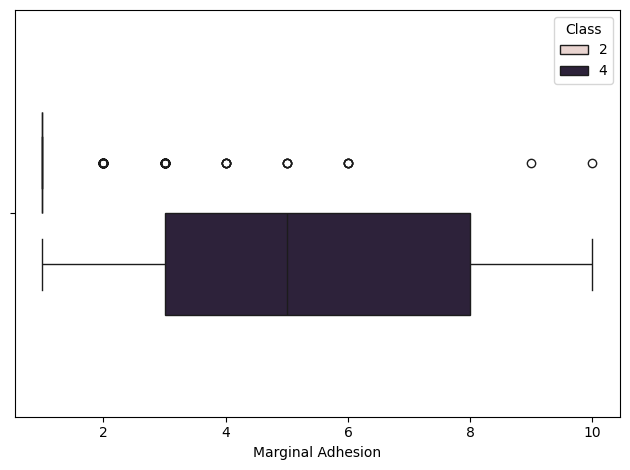

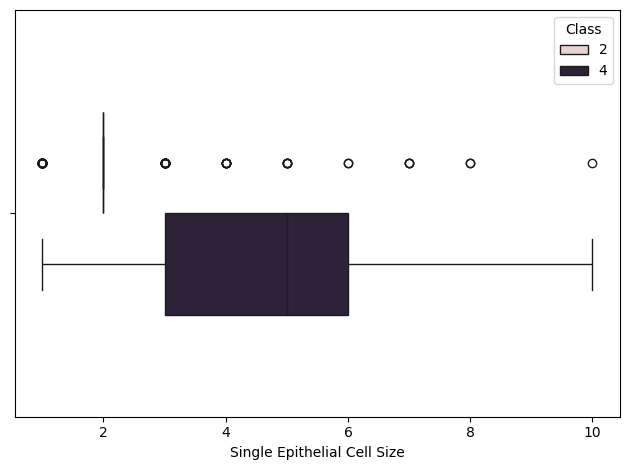

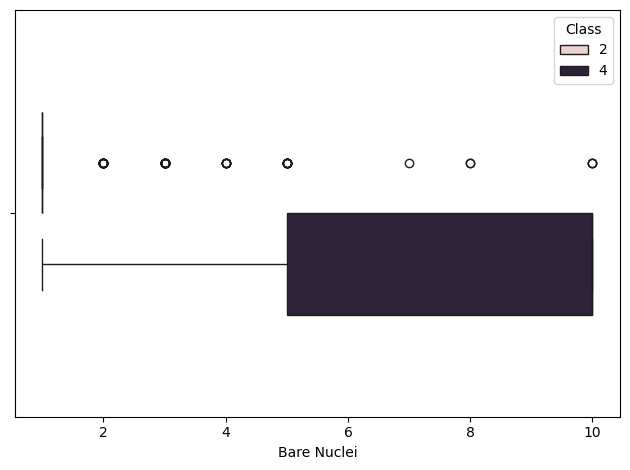

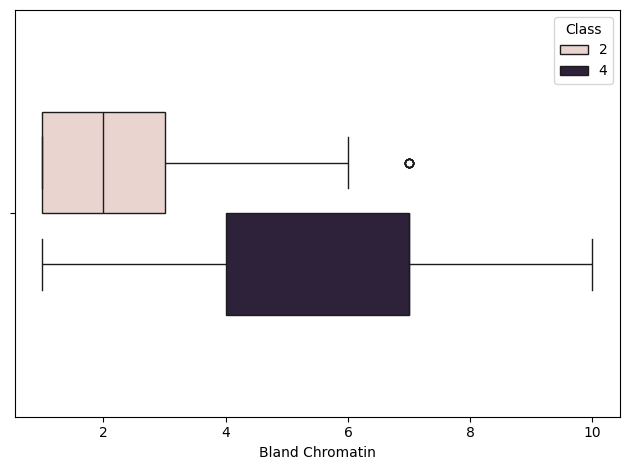

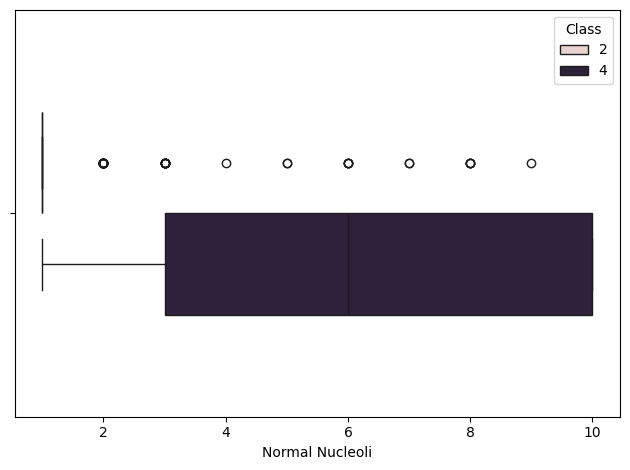

In [9]:
#univariate analysis box plots
#select features to analyze further
selected_features = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli']

# Plot Boxplots for selected numerical features, also checks that all data w/in 1-10 scale
for i, feature in enumerate(selected_features):
    sns.boxplot(x=data[feature], hue= data["Class"], width=.5)
    plt.tight_layout()
    plt.show()

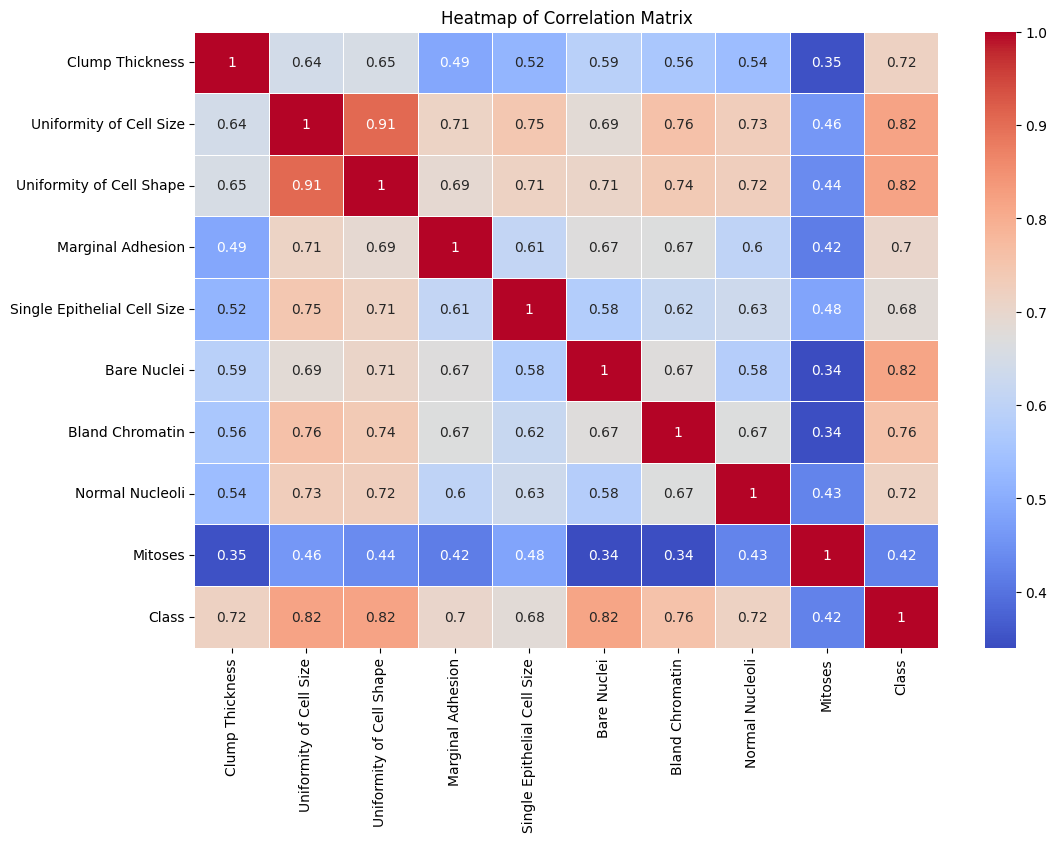

In [10]:
#start bivariate/multivariate analysis with heatmatp to find relationships
# Heatmap of a correlation matrix to show correclation of features
corr_matrix = data[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.4)
plt.title('Heatmap of Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

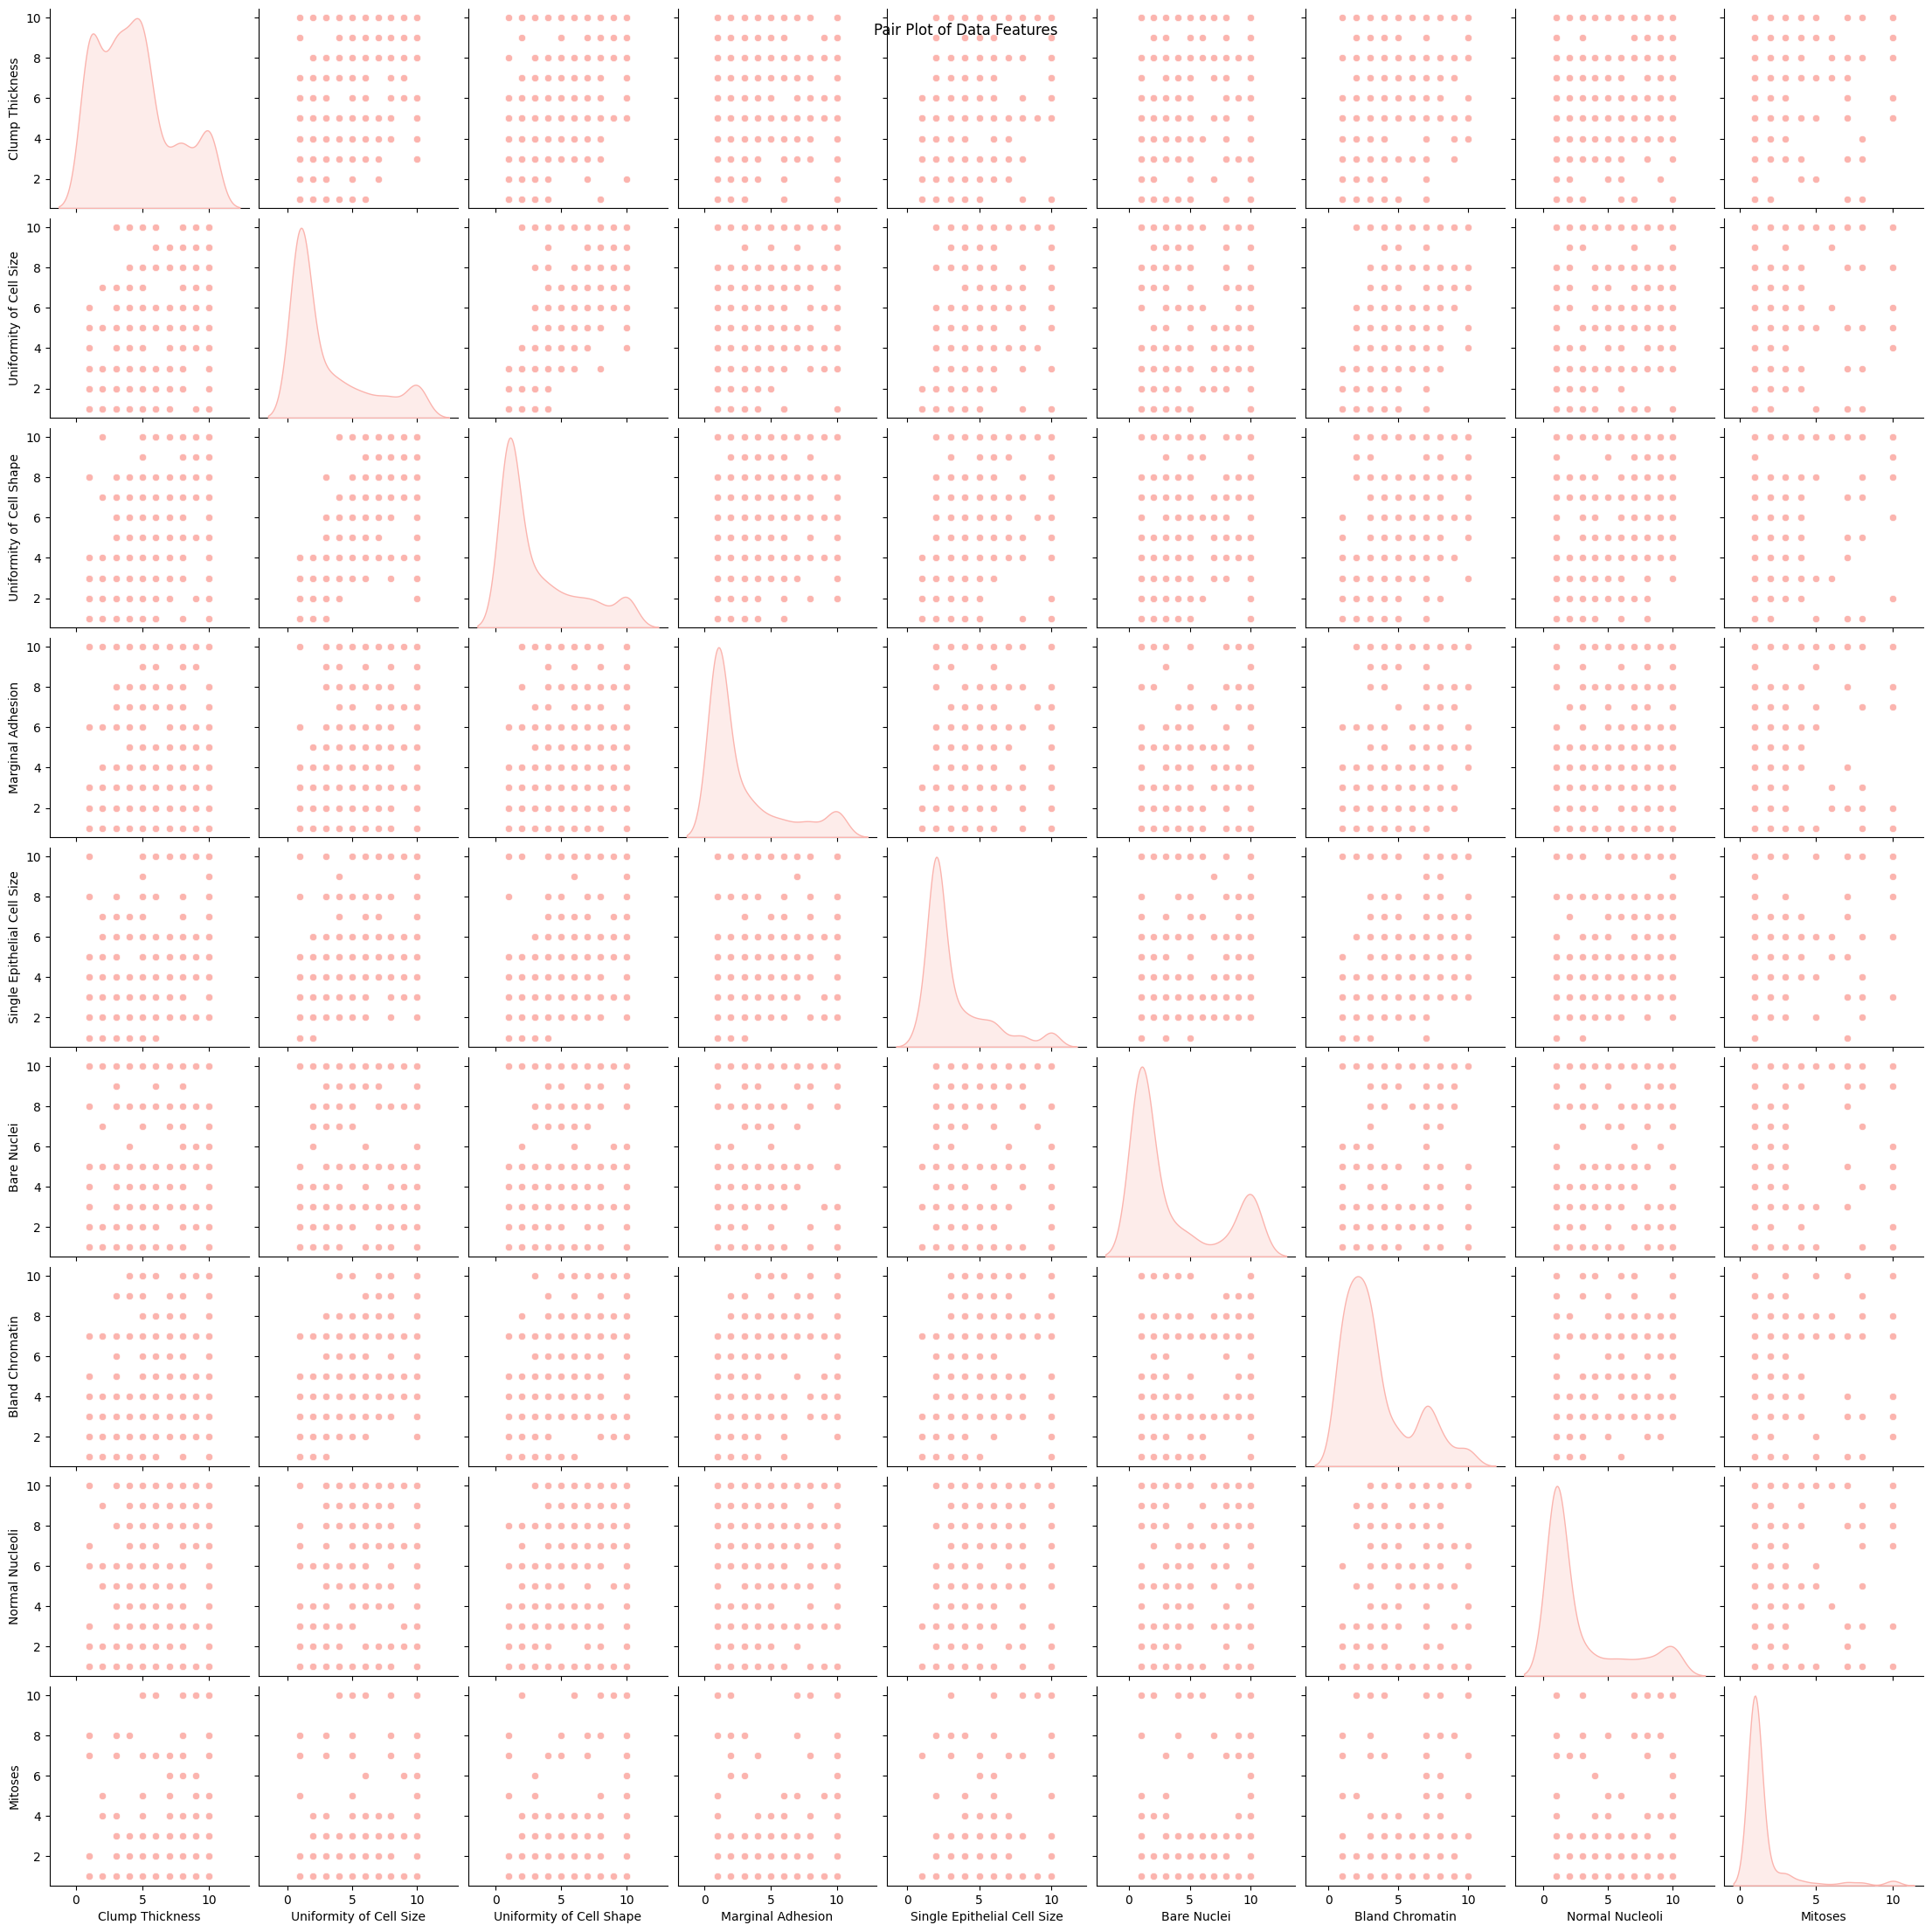

In [11]:
#pair plots to visualize relationships
sns.set_palette("Pastel1")
plt.figure(figsize=(10,6))
sns.pairplot(data[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']], diag_kind = "kde")
plt.suptitle('Pair Plot of Data Features')
plt.show()

ML Models - tamdak8917 - 02/13/25

Heiarchical and K-Means Clustering

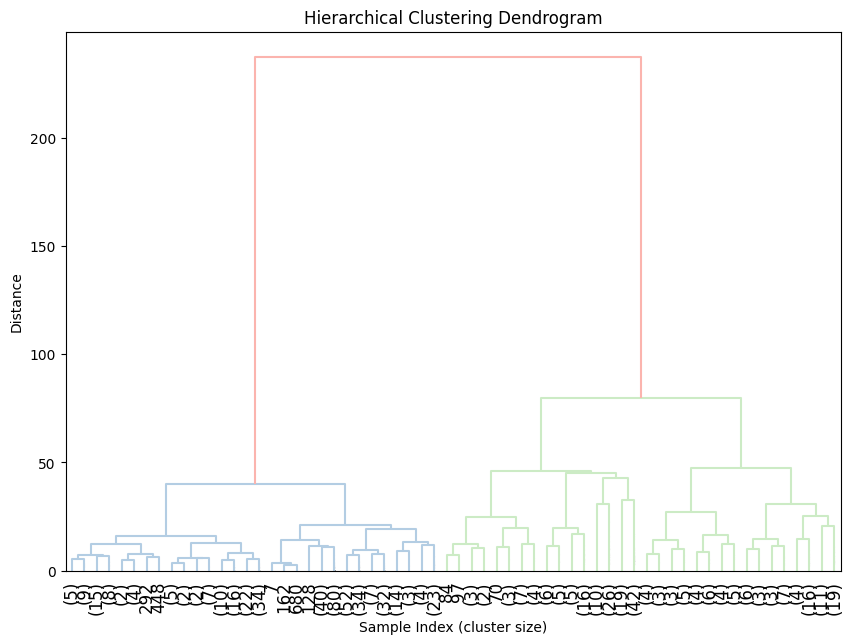

In [12]:
#use hierarchical clustering to identify clusters within data
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering to find a starting k
Z = linkage(data[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']], method='ward')

#plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index (cluster size)")
plt.ylabel("Distance")
plt.show()

KNN

In [13]:
#import libraries for KNN
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#split features and target
X = data.drop(columns =['Class', 'Sample code number'], axis = 1)
y = data['Class']

#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

print(X_train.head)

<bound method NDFrame.head of      Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
178                5                        3                         3   
269                8                        4                         7   
358               10                        3                         5   
535                5                        1                         1   
415                8                        7                         8   
..               ...                      ...                       ...   
71                 1                        3                         3   
106                1                        6                         8   
275                3                        1                         1   
441                1                        1                         1   
102                8                        2                         3   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
1

Classification Report for KNN:
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       132
           4       0.96      0.96      0.96        75

    accuracy                           0.97       207
   macro avg       0.97      0.97      0.97       207
weighted avg       0.97      0.97      0.97       207



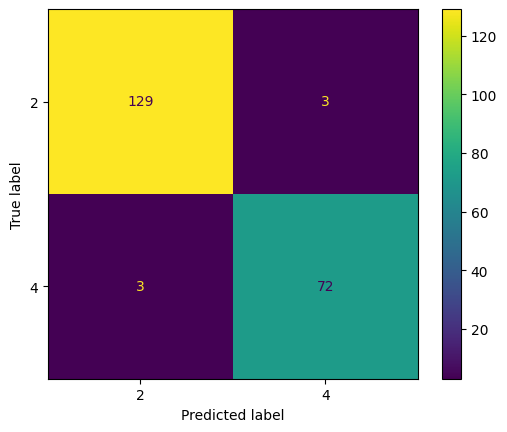

In [14]:
#knn classifier initializing and training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#predict on test set
y_pred_knn = knn.predict(X_test)

#Evaluate model precision, recall, f1-score, suuport(number actual possible)
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

#confusion matrix showing result
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.show()

Classification Report for Scaled KNN:
              precision    recall  f1-score   support

           2       0.96      0.98      0.97       132
           4       0.96      0.93      0.95        75

    accuracy                           0.96       207
   macro avg       0.96      0.96      0.96       207
weighted avg       0.96      0.96      0.96       207



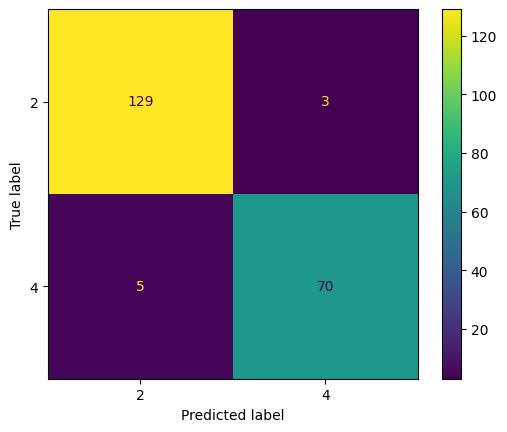

In [15]:
#use standardScaler to improve KNN predictions
from sklearn.preprocessing import StandardScaler

#initialize StandardScaler
scaler = StandardScaler()

#apply scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#knn classifier initializing and training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#predict on test set
y_pred_knn = knn.predict(X_test)

#Evaluate model precision, recall, f1-score, suuport(number actual possible)
print("Classification Report for Scaled KNN:")
print(classification_report(y_test, y_pred_knn))

#confusion matrix showing result
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weig

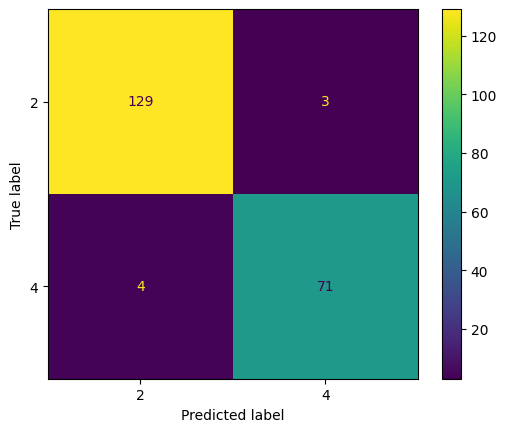

In [16]:
#use GridSearchCV for KNN to find the best set of hyperparameters for tuning
from sklearn.model_selection import GridSearchCV

#define parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

#initialize GridSearchCV with KNN model and parrameter grid
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=2, cv=5)

#fit model to training data
grid_search_knn.fit(X_train, y_train)

#display best parameters and best score
print(f"Best Parameters: {grid_search_knn.best_params_}")
print(f"BestScore: {grid_search_knn.best_score_}")

#make predictions with best estimator
y_pred_knn_tuned = grid_search_knn.best_estimator_.predict(X_test)

#Evaluate tuned model
print("Classification Report for Tuned KNN:")
print (classification_report(y_test, y_pred_knn_tuned))

#Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn_tuned)
plt.show()

For Comprehensive Final Report and Presentation:
Use a new dataframe with three rows of test data, one with features using high likelyhood of malignancy measures, one with low likelyhood, and the final with mid-level.

In [17]:
#create new dataframe
d = {'Clump Thickness':[1,2,3,4,5,6,7,8,9,10], 'Uniformity of Cell Size':[1,2,3,4,5,6,7,8,9,10], 'Uniformity of Cell Shape':[1,2,3,4,5,6,7,8,9,10],'Marginal Adhesion':[1,2,3,4,5,6,7,8,9,10],'Single Epithelial Cell Size':[1,2,3,4,5,6,7,8,9,10],'Bare Nuclei':[1,2,3,4,5,6,7,8,9,10],'Bland Chromatin':[1,2,3,4,5,6,7,8,9,10],'Normal Nucleoli':[1,2,3,4,5,6,7,8,9,10],'Mitoses':[1,2,3,4,5,6,7,8,9,10]}
df = pd.DataFrame(data=d)

#show dataframe
print(df)

#remove feature names to prevent error for K-NN predict
df.columns = [None] * len(df.columns)
print(df)

new_pred_knn = knn.predict(df)
print(new_pred_knn)

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                1                        1                         1   
1                2                        2                         2   
2                3                        3                         3   
3                4                        4                         4   
4                5                        5                         5   
5                6                        6                         6   
6                7                        7                         7   
7                8                        8                         8   
8                9                        9                         9   
9               10                       10                        10   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            1            1   
1                  2                            2            2  

In [18]:
#create new dataframe
d2 = {'Clump Thickness':[1,2,3,4,5,6,7,8,9,10], 'Uniformity of Cell Size':[1,1,1,1,1,1,1,1,1,1], 'Uniformity of Cell Shape':[1,1,1,1,1,1,1,1,1,1],'Marginal Adhesion':[1,1,1,1,1,1,1,1,1,1],'Single Epithelial Cell Size':[1,2,3,4,5,6,7,8,9,10],'Bare Nuclei':[1,1,1,1,1,1,1,1,1,1],'Bland Chromatin':[1,2,3,4,5,6,7,8,9,10],'Normal Nucleoli':[1,1,1,1,1,1,1,1,1,1],'Mitoses':[1,2,3,4,5,6,7,8,9,10]}
df2 = pd.DataFrame(data=d2)

#show dataframe
print(df2)

#remove feature names to prevent error for K-NN predict
df2.columns = [None] * len(df2.columns)
print(df2)

new_pred_knn = knn.predict(df2)
print(new_pred_knn)

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                1                        1                         1   
1                2                        1                         1   
2                3                        1                         1   
3                4                        1                         1   
4                5                        1                         1   
5                6                        1                         1   
6                7                        1                         1   
7                8                        1                         1   
8                9                        1                         1   
9               10                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            1            1   
1                  1                            2            1  

In [19]:
#create new dataframe
d3 = {'Clump Thickness':[1,5,10], 'Uniformity of Cell Size':[10,10,10], 'Uniformity of Cell Shape':[10,10,10],'Marginal Adhesion':[10,10,10],'Single Epithelial Cell Size':[1,5,10],'Bare Nuclei':[10,10,10],'Bland Chromatin':[1,5,10],'Normal Nucleoli':[10,10,10],'Mitoses':[1,5,10]}
df3 = pd.DataFrame(data=d3)

#show dataframe
print(df3)

#remove feature names to prevent error for K-NN predict
df3.columns = [None] * len(df3.columns)
print(df3)

new_pred_knn = knn.predict(df3)
print(new_pred_knn)

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                1                       10                        10   
1                5                       10                        10   
2               10                       10                        10   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                 10                            1           10   
1                 10                            5           10   
2                 10                           10           10   

   Bland Chromatin  Normal Nucleoli  Mitoses  
0                1               10        1  
1                5               10        5  
2               10               10       10  
   None  None  None  None  None  None  None  None  None
0     1    10    10    10     1    10     1    10     1
1     5    10    10    10     5    10     5    10     5
2    10    10    10    10    10    10    10    10    10
[4 4 4]


In [20]:
#create new dataframe
d4 = {'Clump Thickness':[1,5,10], 'Uniformity of Cell Size':[5,5,5], 'Uniformity of Cell Shape':[5,5,5],'Marginal Adhesion':[1,5,10],'Single Epithelial Cell Size':[1,5,10],'Bare Nuclei':[5,5,5],'Bland Chromatin':[1,5,10],'Normal Nucleoli':[1,5,10],'Mitoses':[1,5,10]}
df4 = pd.DataFrame(data=d4)

#show dataframe
print(df4)

#remove feature names to prevent error for K-NN predict
df4.columns = [None] * len(df4.columns)
print(df4)

new_pred_knn = knn.predict(df4)
print(new_pred_knn)

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                1                        5                         5   
1                5                        5                         5   
2               10                        5                         5   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            1            5   
1                  5                            5            5   
2                 10                           10            5   

   Bland Chromatin  Normal Nucleoli  Mitoses  
0                1                1        1  
1                5                5        5  
2               10               10       10  
   None  None  None  None  None  None  None  None  None
0     1     5     5     1     1     5     1     1     1
1     5     5     5     5     5     5     5     5     5
2    10     5     5    10    10     5    10    10    10
[4 4 4]
